In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\sanka\\Desktop\\JPMorganVirtualinternship\\Task 3 and 4_Loan_Data.csv")

In [3]:
df.head(10)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
5,4661159,0,5376.886873,7189.121298,85529.84591,2,697,0
6,8291909,1,3634.057471,7085.980095,68691.57707,6,722,0
7,4616950,4,3302.172238,13067.570210,50352.16821,3,545,1
8,3395789,0,2938.325123,1918.404472,53497.37754,4,676,0
9,4045948,0,5396.366774,5298.824524,92349.55399,2,447,0


## Exploratory Data Analysis

In [5]:
df.head(10)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
5,4661159,0,5376.886873,7189.121298,85529.84591,2,697,0
6,8291909,1,3634.057471,7085.980095,68691.57707,6,722,0
7,4616950,4,3302.172238,13067.570210,50352.16821,3,545,1
8,3395789,0,2938.325123,1918.404472,53497.37754,4,676,0
9,4045948,0,5396.366774,5298.824524,92349.55399,2,447,0


In [6]:
df.dtypes

customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [7]:
df.shape[0]

10000

In [8]:
df['customer_id'].nunique()

10000

In [10]:
#The above result indicates that all the customers are unique in the given dataset and there is not a single customer who applied for loan more than once reflecting the typical uniqueness of the given data

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64


In [12]:
#There are no imputations in the given dataset

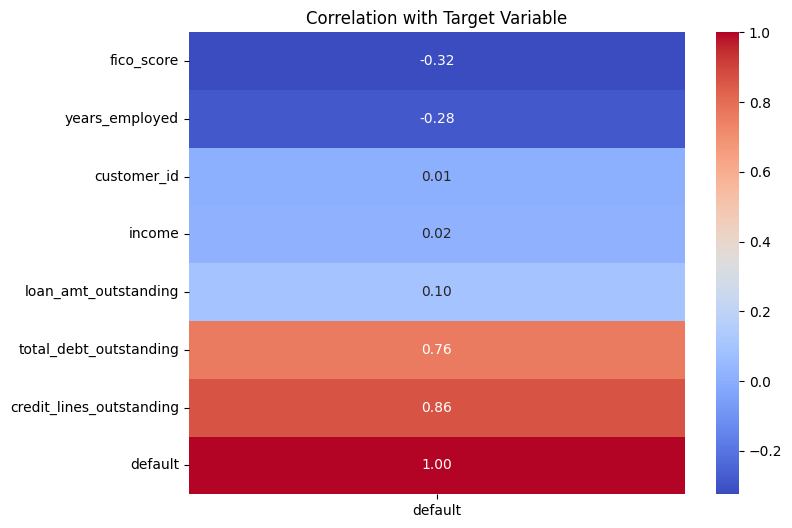

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_with_target = df.corr()['default'].sort_values()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Target Variable')
plt.show()

In [19]:
#Of course the the correlation of default with default is gonna be 1.We dont take it under consideration.Here we can see from the heatmap that columns like customer_id and income doesn't quite influence the default value so we are gonna remove these columns

In [20]:
df.drop(columns=["customer_id","income"],inplace=True)

In [21]:
df.head(10)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,years_employed,fico_score,default
0,0,5221.545193,3915.471226,5,605,0
1,5,1958.928726,8228.752520,2,572,1
2,0,3363.009259,2027.830850,4,602,0
3,0,4766.648001,2501.730397,5,612,0
4,1,1345.827718,1768.826187,6,631,0
5,0,5376.886873,7189.121298,2,697,0
6,1,3634.057471,7085.980095,6,722,0
7,4,3302.172238,13067.570210,3,545,1
8,0,2938.325123,1918.404472,4,676,0
9,0,5396.366774,5298.824524,2,447,0


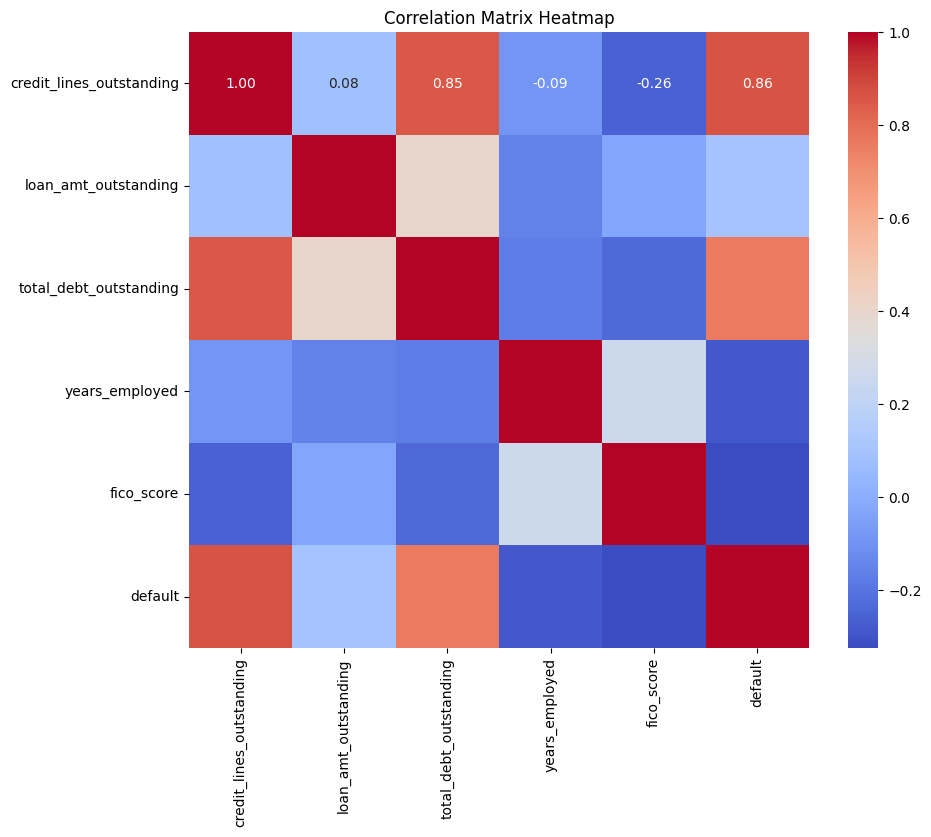

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
#Here 2 columns credit_lines_outstanding and total_debt_outstanding are highly correlated to each other and also to the default rate explicitly hence these 2 columns are very very important

In [24]:
df.head(10)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,years_employed,fico_score,default
0,0,5221.545193,3915.471226,5,605,0
1,5,1958.928726,8228.752520,2,572,1
2,0,3363.009259,2027.830850,4,602,0
3,0,4766.648001,2501.730397,5,612,0
4,1,1345.827718,1768.826187,6,631,0
5,0,5376.886873,7189.121298,2,697,0
6,1,3634.057471,7085.980095,6,722,0
7,4,3302.172238,13067.570210,3,545,1
8,0,2938.325123,1918.404472,4,676,0
9,0,5396.366774,5298.824524,2,447,0


## Final Dataset splitting into training dataset and test dataset

In [25]:
df[df['default'] == 1].shape[0]

1851

In [26]:
df_1s=df[df['default'] == 1]
df_0s=df[df['default'] == 0]

In [27]:
df_1s.head(10)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,years_employed,fico_score,default
1,5,1958.928726,8228.75252,2,572,1
7,4,3302.172238,13067.57021,3,545,1
10,5,4224.542337,18858.28272,7,640,1
18,5,2761.049506,16620.80342,4,627,1
21,4,2608.798997,11177.43742,1,480,1
32,5,3507.902474,19990.89793,4,542,1
37,5,5691.710738,25802.31520,4,541,1
39,5,4296.127286,22541.02600,2,607,1
44,5,3308.441678,18042.03529,4,552,1
57,5,3848.509319,18052.44355,4,587,1


In [28]:
df_0s.head(10)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,years_employed,fico_score,default
0,0,5221.545193,3915.471226,5,605,0
2,0,3363.009259,2027.830850,4,602,0
3,0,4766.648001,2501.730397,5,612,0
4,1,1345.827718,1768.826187,6,631,0
5,0,5376.886873,7189.121298,2,697,0
6,1,3634.057471,7085.980095,6,722,0
8,0,2938.325123,1918.404472,4,676,0
9,0,5396.366774,5298.824524,2,447,0
11,1,5470.063690,10357.636060,5,636,0
12,1,3440.842174,7009.017521,3,527,0


In [30]:
from sklearn.model_selection import train_test_split
df_1s_train, df_1s_test = train_test_split(df_1s, test_size=0.2, random_state=42)

In [31]:
df_0s_train, df_0s_test = train_test_split(df_0s, test_size=0.2, random_state=42)

In [32]:
df_1s_train.head(10)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,years_employed,fico_score,default
1436,5,4965.810848,30024.225040,5,659,1
5949,5,4086.946133,18591.405200,4,644,1
6866,5,5759.440248,26748.482740,3,571,1
6755,4,3601.957424,15613.416190,2,490,1
6804,5,4327.131554,28223.460640,4,594,1
3247,3,3861.633284,9563.815184,3,563,1
5295,4,3871.349295,11849.854320,5,629,1
5262,4,3831.626965,15250.593590,1,540,1
4580,5,7179.186521,21206.034200,7,623,1
9460,5,2710.424018,10495.079440,3,456,1


In [33]:
df_1s_test.head(10)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,years_employed,fico_score,default
1378,5,6624.650409,30884.987530,4,626,1
8452,5,4992.307979,20320.199440,4,494,1
2722,4,6064.541130,29799.570260,2,611,1
4403,5,1007.110384,5526.255844,4,628,1
6702,5,5541.820831,27788.110060,4,688,1
8780,5,3177.883857,16834.910490,5,564,1
9496,5,4598.075278,22053.075820,4,594,1
5091,5,2628.467516,21765.236180,4,507,1
4574,4,4730.606688,17557.283870,1,570,1
6363,4,4769.444861,16026.534860,3,628,1


In [34]:
df_0s_train.head(10)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,years_employed,fico_score,default
4625,1,8392.481654,10993.939880,6,668,0
4614,0,6985.833862,6472.158241,5,562,0
8313,2,5377.604259,8269.899401,7,744,0
7409,1,3930.764746,5430.303743,6,684,0
7242,1,4311.264586,7048.268347,6,685,0
9440,1,7175.005769,9242.107754,6,673,0
4912,0,3616.266018,2655.499014,4,656,0
1383,0,5057.805192,5153.869131,5,612,0
7412,1,4963.270847,7576.295604,6,667,0
2757,1,4872.030056,7833.586780,5,666,0


In [35]:
df_0s_test.head(10)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,years_employed,fico_score,default
3221,0,3843.327696,8574.747616,3,508,0
589,1,4349.851362,8250.744791,6,644,0
9998,0,3288.901666,1043.099660,2,647,0
9986,1,5461.278743,7678.078716,5,632,0
4667,1,4336.096604,8430.374191,7,695,0
5363,0,4720.861857,3775.389688,5,752,0
6619,0,8409.617022,9395.965010,3,667,0
8029,0,5828.640562,1018.086163,2,625,0
7199,0,3207.636674,4729.653610,6,622,0
3107,2,5657.887144,11512.719770,3,587,0


In [38]:
from sklearn.utils import shuffle
df_train = shuffle(pd.concat([df_1s_train, df_0s_train], ignore_index=True))

In [39]:
df_test = shuffle(pd.concat([df_1s_test, df_0s_test], ignore_index=True))

In [40]:
df_train.head(10)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,years_employed,fico_score,default
5330,0,2886.340104,3010.574155,5,573,0
2070,1,3070.300933,5367.397712,6,612,0
2180,1,4311.092774,7740.740689,6,704,0
4862,2,3999.894103,7714.874420,5,684,0
475,5,3099.007102,16913.476350,4,527,1
879,5,2949.957398,13513.183480,3,531,1
4432,0,5291.427631,4593.554519,4,637,0
3575,1,3435.821026,5302.365261,6,650,0
6000,3,5366.319942,13181.239990,4,616,0
2609,0,5953.864559,7690.464471,2,563,0


In [41]:
df_test.head(10)

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,years_employed,fico_score,default
601,0,4585.151073,6082.309066,3,632,0
1375,1,5658.380805,8290.147118,5,695,0
346,5,6034.801727,24343.611120,6,632,1
1366,3,4921.612545,12795.913600,4,607,0
1054,2,5527.108083,12660.039830,4,700,0
1438,1,3658.697821,6782.372549,6,605,0
592,1,2305.034450,4681.362495,7,578,0
755,0,6078.160129,2554.751912,6,604,0
1994,1,3831.904861,5653.217775,5,704,0
1840,0,2496.462503,3153.332381,5,742,0


In [43]:
df_train[df_train["default"]==1].shape[0]

1480

In [44]:
df_test[df_test["default"]==1].shape[0]

371

## Usage of various models on the given dataset and selection of the optimum one (The one with the best results)

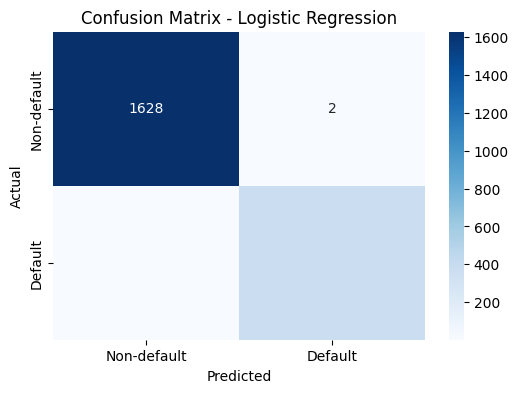

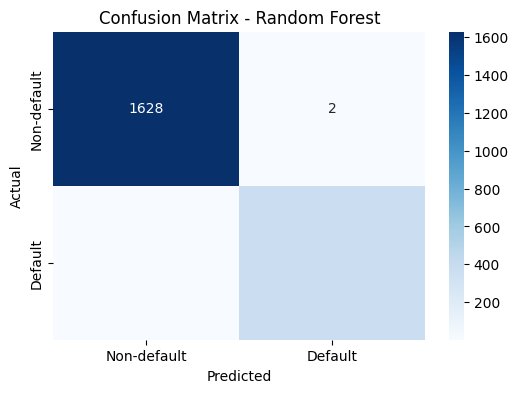

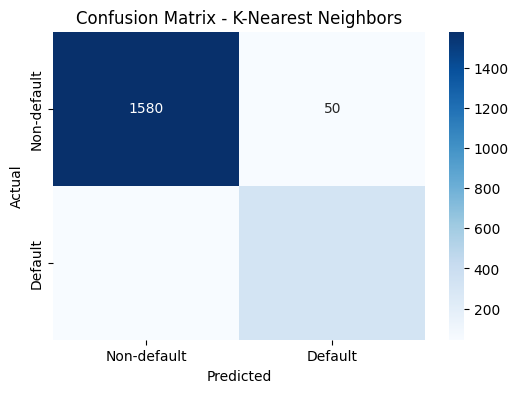

Model Comparison:
                  Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0  Logistic Regression  0.998001   0.998001  0.998001  0.998001  0.999962
1        Random Forest  0.997001   0.996999  0.997001  0.996998  0.999931
2  K-Nearest Neighbors  0.952524   0.952787  0.952524  0.952646  0.972233

Best Model: Logistic Regression
Model Weights (Coefficients or Feature Importances):
[[ 7.87323978e+00 -4.06840157e-04  1.71325711e-04 -2.77936629e+00
  -2.38507865e-02]]

Predictions for Test Data:
 [0 0 1 ... 1 0 1]


In [50]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')  # Suppress convergence warnings

# Defining the data
train_data = df_train
test_data = df_test
X_train = train_data.drop('default', axis=1)
y_train = train_data['default']
X_test = test_data.drop('default', axis=1)
y_test = test_data['default']

# Defining the models to compare (only three models)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Storing results
results = []

# Training, predicting, and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_test, y_prob)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Storing results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc_roc
    })

# Creating DataFrame of results
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("Model Comparison:\n", results_df)

# Getting the best model (based on F1 Score)
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

# Output the best model and its weights
print(f"\nBest Model: {best_model_name}")
print("Model Weights (Coefficients or Feature Importances):")

if hasattr(best_model, "coef_"):  # For models like Logistic Regression
    print(best_model.coef_)
elif hasattr(best_model, "feature_importances_"):  # For models like RandomForest
    print(best_model.feature_importances_)
else:
    print("No coefficients or feature importances available.")

# Now, the best model is ready for predictions
# Example:
# Using it to predict on test data (X_test or new data you want to classify)
predictions = best_model.predict(X_test)

# Output predictions for X_test (or new data)
print("\nPredictions for Test Data:\n", predictions)

In [52]:
#An Example
import numpy as np
new_data = [5, 3000, 17000, 4, 530]
new_data_reshaped = np.array(new_data).reshape(1, -1)
prediction = best_model.predict(new_data_reshaped)
print("Prediction for the new data point:", prediction)

Prediction for the new data point: [1]


In [53]:
df.dtypes

credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [62]:
def lossfunc(a,b,c,d,e):
    l=[]
    l.append(a)
    l.append(b)
    l.append(c)
    l.append(d)
    l.append(e)
    l_reshaped = np.array(l).reshape(1, -1)
    prediction = best_model.predict(l_reshaped)
    loss=float(0)
    if prediction==1:
        loss+=b*0.9
    return loss

In [63]:
cls=int(input("Enter credit_lines_outstanding of the given client: "))
lao=float(input("Enter loan_amt_outstanding of the given client: "))
tdo=float(input("Enter total_debt_outstanding of the given client: "))
ye=int(input("Enter years_employed of the given client: "))
fs=int(input("Enter fico_score of the given client: "))
loss=lossfunc(cls,lao,tdo,ye,fs)
if loss==0:
    print("No loss incurred.")
else:
    print("The Loss incurred in this case is: ",loss)

Enter credit_lines_outstanding of the given client:  5
Enter loan_amt_outstanding of the given client:  3000
Enter total_debt_outstanding of the given client:  17000
Enter years_employed of the given client:  4
Enter fico_score of the given client:  530


The Loss incurred in this case is:  2700.0
